<a href="https://colab.research.google.com/github/Overleaff/Image_processing/blob/main/Chap5Segmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import cv2
from matplotlib import pyplot as plt
import numpy as np
import math
import os

# Kmeans

In [ ]:
!curl -O https://raw.githubusercontent.com/Overleaff/image/main/activity/tennis.jpeg
image_path = "tennis.jpeg"

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 11587  100 11587    0     0  83359      0 --:--:-- --:--:-- --:--:-- 83359


[[ 90.  83.  91.]
 [  4.   0.   5.]
 [  4.   0.   9.]
 ...
 [106. 114.  54.]
 [106. 114.  54.]
 [106. 114.  54.]]
[[ 30  36  39]
 [174 171 164]
 [124 129  74]]


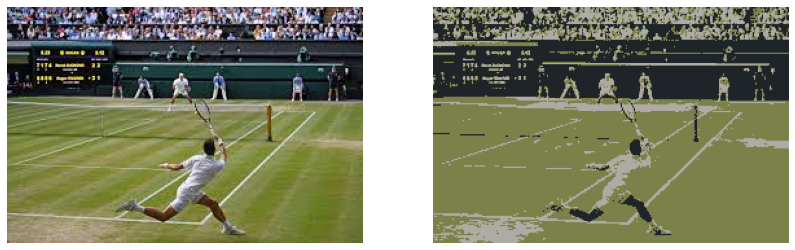

In [ ]:
#Initialize array subplot
size = 2
f, axarr = plt.subplots(1, size) 
f.set_figheight(size * 7)
f.set_figwidth(size * 7)

####
img = cv2.imread(image_path)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

axarr[0].axis('off')
axarr[0].imshow(img)


# Reshaping the image into a 2D array of pixels and 3 color values (RGB)
pixel_vals = img.reshape((-1,3))
# Convert to float type
pixel_vals = np.float32(pixel_vals)
print(pixel_vals)

#the below line of code defines the criteria for the algorithm to stop running,
#which will happen is 100 iterations are run or the epsilon (which is the required accuracy)
#becomes 85%
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 100, 0.85)
 
# then perform k-means clustering wit h number of clusters defined as 3
# also random centres are initially choosed for k-means clustering
k = 3
retval, labels, centers = cv2.kmeans(pixel_vals, k, None, criteria, 10, cv2.KMEANS_RANDOM_CENTERS)
 
# convert data into 8-bit values
centers = np.uint8(centers)
print(centers)
#np.set_printoptions(threshold=np.inf)
segmented_data = centers[labels.flatten()]
 
# reshape data into the original image dimensions
segmented_image = segmented_data.reshape((img.shape))

axarr[1].axis('off')
axarr[1].imshow(segmented_image)

plt.show()

In [ ]:
#kmeans texture base

# Split and merge

In [ ]:
!curl -O https://raw.githubusercontent.com/Overleaff/image/main/landscape/pexels-aleksandar-pasaric-2341830.jpg
image_path1 = "pexels-aleksandar-pasaric-2341830.jpg"

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 2290k  100 2290k    0     0  9542k      0 --:--:-- --:--:-- --:--:-- 9542k


In [ ]:
def Division_Judge(img, h0, w0, h, w) :
    area = img[h0 : h0 + h, w0 : w0 + w]
    mean = np.mean(area)
    std = np.std(area, ddof = 1)

    total_points = 0
    operated_points = 0

    for row in range(area.shape[0]) :
        for col in range(area.shape[1]) :
            if (area[row][col] - mean) < 2 * std :
                operated_points += 1
            total_points += 1

    if operated_points / total_points >= 0.95 :
        return True
    else :
        return False

def Merge(img, h0, w0, h, w) :
    # area = img[h0 : h0 + h, w0 : w0 + w]
    # _, thresh = cv.threshold(area, 0, 255, cv.THRESH_OTSU + cv.THRESH_BINARY_INV)
    # img[h0 : h0 + h, w0 : w0 + w] = thresh
    for row in range(h0, h0 + h) :
        for col in range(w0, w0 + w) :
            if img[row, col] > 100 and img[row, col] < 200:
                img[row, col] = 0
            else :
                img[row, col] = 255

def Recursion(img, h0, w0, h, w) :
    # If the splitting conditions are met, continue to split 
    if not Division_Judge(img, h0, w0, h, w) and min(h, w) > 5 :
        # Recursion continues to determine whether it can continue to split 
        # Top left square 
        Division_Judge(img, h0, w0, int(h0 / 2), int(w0 / 2))
        # Upper right square 
        Division_Judge(img, h0, w0 + int(w0 / 2), int(h0 / 2), int(w0 / 2))
        # Lower left square 
        Division_Judge(img, h0 + int(h0 / 2), w0, int(h0 / 2), int(w0 / 2))
        # Lower right square 
        Division_Judge(img, h0 + int(h0 / 2), w0 + int(w0 / 2), int(h0 / 2), int(w0 / 2))
    else :
        # Merge 
        Merge(img, h0, w0, h, w)

def Division_Merge_Segmented(image_path1) :
    img = cv2.imread(image_path1)
    img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    hist, bins = np.histogram(img_gray, bins = 256)
    print(f' Five-pointed star 、 The ellipse 、 background 、 The pixel values of pentagons are ：'f'{"、".join("%s" % pixel for pixel in np.unique(img_gray))}')

    segemented_img = img_gray.copy()
    Recursion(segemented_img, 0, 0, segemented_img.shape[0], segemented_img.shape[1])

    plt.figure(figsize=(12, 4))
    plt.subplot(131), plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    plt.axis('off'), plt.title(f'$input\_image$')
    plt.subplot(132), plt.imshow(img_gray, cmap='gray', vmin = 0, vmax = 255)
    plt.axis('off'), plt.title(f'$gray\_image$')
    plt.subplot(133), plt.imshow(segemented_img, cmap='gray')
    plt.axis('off'), plt.title(f'$segmented\_image$')
    plt.tight_layout()
    plt.show()


Division_Merge_Segmented(image_path1)

 Five-pointed star 、 The ellipse 、 background 、 The pixel values of pentagons are ：0、1、2、3、4、5、6、7、8、9、10、11、12、13、14、15、16、17、18、19、20、21、22、23、24、25、26、27、28、29、30、31、32、33、34、35、36、37、38、39、40、41、42、43、44、45、46、47、48、49、50、51、52、53、54、55、56、57、58、59、60、61、62、63、64、65、66、67、68、69、70、71、72、73、74、75、76、77、78、79、80、81、82、83、84、85、86、87、88、89、90、91、92、93、94、95、96、97、98、99、100、101、102、103、104、105、106、107、108、109、110、111、112、113、114、115、116、117、118、119、120、121、122、123、124、125、126、127、128、129、130、131、132、133、134、135、136、137、138、139、140、141、142、143、144、145、146、147、148、149、150、151、152、153、154、155、156、157、158、159、160、161、162、163、164、165、166、167、168、169、170、171、172、173、174、175、176、177、178、179、180、181、182、183、184、185、186、187、188、189、190、191、192、193、194、195、196、197、198、199、200、201、202、203、204、205、206、207、208、209、210、211、212、213、214、215、216、217、218、219、220、221、222、223、224、225、226、227、228、229、230、231、232、233、234、235、236、237、238、239、240、241、242、243、244、245、246、247、248、249、250、251、252、253、254、255


/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:3441: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/usr/local/lib/python3.7/dist-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/usr/local/lib/python3.7/dist-packages/numpy/core/_methods.py:263: RuntimeWarning: Degrees of freedom <= 0 for slice
  keepdims=keepdims, where=where)
/usr/local/lib/python3.7/dist-packages/numpy/core/_methods.py:223: RuntimeWarning: invalid value encountered in true_divide
  subok=False)
/usr/local/lib/python3.7/dist-packages/numpy/core/_methods.py:254: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


ZeroDivisionError: ignored

# Watershed

In [ ]:
#https://docs.opencv.org/4.x/d3/db4/tutorial_py_watershed.html